The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


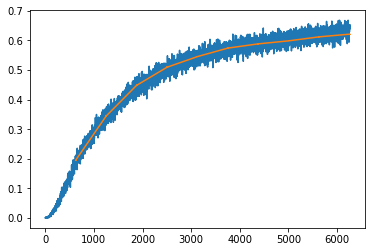

In [20]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")
from functools import partial
from pathlib import Path
import torch
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

alphas = (0.1, 0.25, 0.5, 0.75, 1.0)
ratios = (0.01, 0.1, 0.2, 0.5, 0.75)

metrics_names = ("train_acc", "val_acc_checkpoints", "train_top-5-acc", "val_top-5-acc_checkpoints", "train_nll", "val_nll_checkpoints")

def get_metrics(annot_quality, ratio, metrics_names):
    exp_name = "dino_ssl_linear_imagenet_1k"
    # exp_name = "test"
    exp_sub_name = f"annot_quality_{annot_quality}_ratio_{ratio}"
    dir_ = Path.cwd().parent / "stored" / exp_name / exp_sub_name
    return map(lambda name: (name, np.genfromtxt(dir_ / f"{name}.csv", delimiter=",", skip_header=1)), metrics_names)

ms = dict(get_metrics(0.1, 0.5, metrics_names))

train_loss = ms["train_nll"]
val_loss = ms["val_nll_checkpoints"]
train_acc = ms["train_acc"]
val_acc = ms["val_acc_checkpoints"]
train_acc_top_5 = ms["train_top-5-acc"]
val_acc_top_5 = ms["val_top-5-acc_checkpoints"]
fig, ax = plt.subplots()
#ax.plot(train_loss)
#ax.errorbar(x=val_loss[:, 0], y=val_loss[:, 2], yerr=val_loss[:, 3]);
ax.plot(train_acc)
ax.errorbar(x=val_acc[:, 0], y=val_acc[:, 2], yerr=val_acc[:, 3]);


In [3]:
print(ms)

{'train_acc': array([0.        , 0.        , 0.        , ..., 0.65332031, 0.63769531,
       0.65239727]), 'val_acc_checkpoints': array([[6.25000000e+02, 4.80000000e+01, 1.94921424e-01, 1.71434077e-03],
       [1.25100000e+03, 9.70000000e+01, 3.44115198e-01, 3.79776792e-03],
       [1.87700000e+03, 1.46000000e+02, 4.47877359e-01, 3.14854047e-03],
       [2.50300000e+03, 1.95000000e+02, 5.09125885e-01, 2.55658997e-03],
       [3.12900000e+03, 2.44000000e+02, 5.45146669e-01, 2.47710108e-03],
       [3.75500000e+03, 2.93000000e+02, 5.73858343e-01, 2.37551255e-03],
       [4.38100000e+03, 3.42000000e+02, 5.88192070e-01, 2.28426936e-03],
       [5.00700000e+03, 3.91000000e+02, 5.98398437e-01, 2.07365733e-03],
       [5.63300000e+03, 4.40000000e+02, 6.11914431e-01, 2.39670834e-03],
       [6.25900000e+03, 4.89000000e+02, 6.20959611e-01, 2.06014401e-03]]), 'train_nll': array([8.40874767, 8.35403061, 8.51115799, ..., 2.24714065, 2.33933091,
       2.24243188]), 'val_nll_checkpoints': array([[6

In [30]:
for a in alphas:
    for r in ratios:
        ms = dict(get_metrics(a, r, metrics_names))
        ext_ts, ts, mean, std = ms["val_top-5-acc_checkpoints"][-1]
        print(f"alpha: {a}, ratio: {r}, acc: {mean:.2f}+-{std:.2f}")

alpha: 0.1, ratio: 0.01, acc: 0.03+-0.00
alpha: 0.1, ratio: 0.1, acc: 0.49+-0.00
alpha: 0.1, ratio: 0.2, acc: 0.66+-0.00
alpha: 0.1, ratio: 0.5, acc: 0.79+-0.00
alpha: 0.1, ratio: 0.75, acc: 0.83+-0.00
alpha: 0.25, ratio: 0.01, acc: 0.25+-0.00
alpha: 0.25, ratio: 0.1, acc: 0.80+-0.00
alpha: 0.25, ratio: 0.2, acc: 0.84+-0.00
alpha: 0.25, ratio: 0.5, acc: 0.88+-0.00
alpha: 0.25, ratio: 0.75, acc: 0.89+-0.00
alpha: 0.5, ratio: 0.01, acc: 0.57+-0.00
alpha: 0.5, ratio: 0.1, acc: 0.87+-0.00
alpha: 0.5, ratio: 0.2, acc: 0.89+-0.00
alpha: 0.5, ratio: 0.5, acc: 0.90+-0.00
alpha: 0.5, ratio: 0.75, acc: 0.91+-0.00
alpha: 0.75, ratio: 0.01, acc: 0.72+-0.00
alpha: 0.75, ratio: 0.1, acc: 0.88+-0.00
alpha: 0.75, ratio: 0.2, acc: 0.89+-0.00
alpha: 0.75, ratio: 0.5, acc: 0.91+-0.00
alpha: 0.75, ratio: 0.75, acc: 0.91+-0.00
alpha: 1.0, ratio: 0.01, acc: 0.78+-0.00
alpha: 1.0, ratio: 0.1, acc: 0.88+-0.00
alpha: 1.0, ratio: 0.2, acc: 0.89+-0.00
alpha: 1.0, ratio: 0.5, acc: 0.90+-0.00
alpha: 1.0, ratio: 0.

Text(0, 0.5, 'annot qual. alpha')

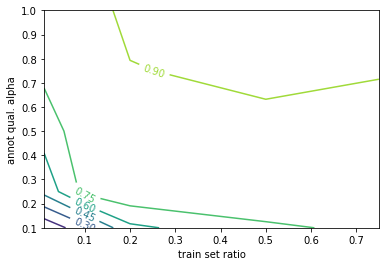

In [36]:
R, A = np.meshgrid(ratios, alphas)
Z = torch.empty((len(ratios), len(alphas)))

for i_r, r in enumerate(ratios):
    for i_a, a in enumerate(alphas):
        ms = dict(get_metrics(a, r, metrics_names))
        _, _, mean, _ = ms["val_top-5-acc_checkpoints"][-1]
        Z[i_r, i_a] = mean
        
fig, ax = plt.subplots()
CS = ax.contour(R, A, Z)
ax.clabel(CS, inline=True, fontsize=10)
#plt.xscale('log')
ax.set_title
ax.set_xlabel("train set ratio")
ax.set_ylabel("annot qual. alpha")